In [111]:
import sys
import pathlib
import os
from nltk.stem.snowball import SpanishStemmer
import re

In [112]:
MIN_LENGTH = 2
MAX_LENGTH = 25
stemming_enabled = True
in_file = "quijote.txt"
palabras_vacias = []

Definimos algunas funciones para normalizar las cadenas. Tomamos como base los programas anteriores, eliminando signos de puntuación, tildes y pasando a minúsculas.  

In [113]:
def remove_punctuation(token):
    return re.sub("\W", "", token)

def translate(to_translate):
    tabin = u'áäâàãéëèêẽíïĩìîóõöòôúüùûũ'
    tabout = u'aaaaaeeeeeiiiiiooooouuuuu'
    tabin = [ord(char) for char in tabin]
    translate_table = dict(zip(tabin, tabout))
    return to_translate.translate(translate_table)

def normalize(token, stemmer):
    result = token.lower()
    result = translate(result)       
    return result

In [114]:
frequencies = {}
total_tokens  = 0
total_terms = 0

if stemming_enabled:
    stemmer = SpanishStemmer()

with open(in_file, "r", encoding="utf-8") as f:
    for line in f.readlines():
        tokens_list = [remove_punctuation(normalize(x, stemmer)) for x in line.strip().split()]

        for token in tokens_list:                                     
            total_tokens += 1
            if token not in palabras_vacias and len(token) >= MIN_LENGTH and len(token) <= MAX_LENGTH:
                if stemming_enabled:
                    token = stemmer.stem(token)
                if token in frequencies.keys():
                    frequencies[token] += 1
                else: # Si es la primera vez que veo este token, se agrega a los términos en 1
                    frequencies[token] = 1         
                    total_terms += 1                    

In [115]:
sorted_dict = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))

Dentro de un diccionario almacenamos los términos y la fecuencia de cada uno. Luego lo ordenamos de mayor a menor por la misma.

A continuación, calculamos las curvas de ajuste:

In [116]:
import numpy as np
x_log = np.log(range(1,len(sorted_dict)+1))
y_log = np.log(list(sorted_dict.values()))

In [117]:
ajuste = np.polyfit(list(x_log), y_log, 1)
recta = np.poly1d(ajuste)

In [118]:
#y_pred = np.power(x_original, 3)*recta[0] + (np.square(x_original))*recta[1] + x_original*recta[2] + recta[3]

In [119]:
y_pred = x_log*recta[1] + recta[0]

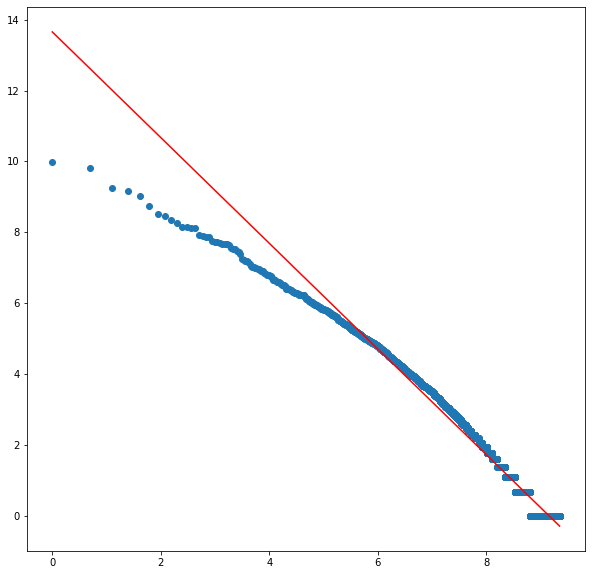

In [120]:
import matplotlib.pyplot as plt
plt.scatter(x_log, y_log)
plt.plot(x_log, y_pred, color="red")
plt.show()

In [121]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*(x**b)

x = list(range(1,len(sorted_dict)+1))
y = list(sorted_dict.values())

popt, pcov = curve_fit(func, x, y)
ajustados = func(x, *popt)

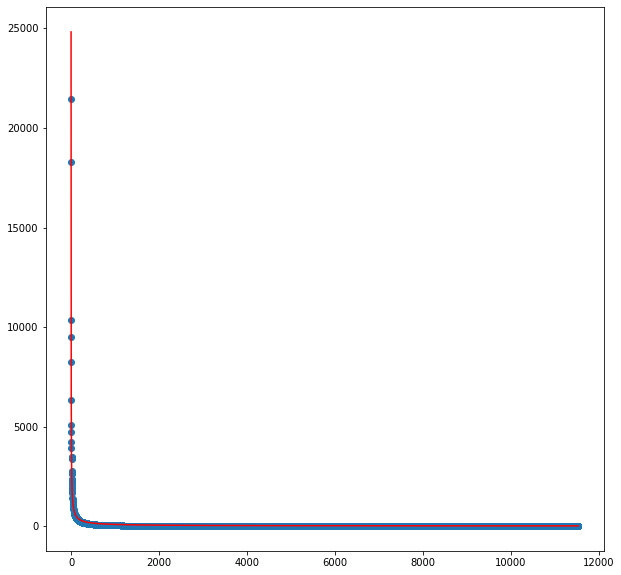

In [122]:
plt.plot(x, ajustados, color="red")
plt.scatter(x,y)
plt.show()

En el gráfico anterior contamos con una curva que ajusta perfecto a los puntos de la distribución original. top_frequency = frequencies[0]

Medimos la correlación entre los puntos para comprobar cómo se comporta la predicción.

In [132]:
top_frequency = list(sorted_dict.items())[0][1]

21475

In [133]:
zipf_prediction = []
for index, item in enumerate(sorted_dict, start=1):
    zipf_frequency = top_frequency * (1 / index)        
    zipf_prediction.append(zipf_frequency)

In [134]:
zipf_prediction

[21475.0,
 10737.5,
 7158.333333333333,
 5368.75,
 4295.0,
 3579.1666666666665,
 3067.8571428571427,
 2684.375,
 2386.111111111111,
 2147.5,
 1952.2727272727273,
 1789.5833333333333,
 1651.923076923077,
 1533.9285714285713,
 1431.6666666666667,
 1342.1875,
 1263.235294117647,
 1193.0555555555554,
 1130.2631578947369,
 1073.75,
 1022.6190476190476,
 976.1363636363636,
 933.695652173913,
 894.7916666666666,
 859.0,
 825.9615384615385,
 795.3703703703703,
 766.9642857142857,
 740.5172413793103,
 715.8333333333334,
 692.741935483871,
 671.09375,
 650.7575757575758,
 631.6176470588235,
 613.5714285714286,
 596.5277777777777,
 580.4054054054054,
 565.1315789473684,
 550.6410256410256,
 536.875,
 523.780487804878,
 511.3095238095238,
 499.4186046511628,
 488.0681818181818,
 477.22222222222223,
 466.8478260869565,
 456.9148936170213,
 447.3958333333333,
 438.2653061224489,
 429.5,
 421.078431372549,
 412.9807692307692,
 405.188679245283,
 397.68518518518516,
 390.45454545454544,
 383.482142857